# Data Provenance 

1. Where is the data from?
    - The data is from World Soil Informance product called SoilGrids (https://www.isric.org/explore/soilgrids)

2. Is it reliable? (partially subjective)
    - Yes, found the resource from a SDM paper
    
# Time measures

1. Time range of the dataset
    - The dataset has only spatial aspect but since the new version was released in 2017 we can assume the data is up-to-date
    
2. Granularity (Weekly, Monthly, Aperiodic, Daily, Timestamp)
    - N/A

# Location

1. Is it available for the UK, Brazil/India?
    - Yes
    
2. Granularity (is it a pin point location?, Rounded coordinates?...)
    - 250m resolution
    
3. Format (shape files, lat long, geographical code)
    - Output is an image which can queried by EPSG 29101 mapping of lat, long
    
# Data Gaps and size

1. Size of the data
   - Too large to download entire global data, need to subset by lat/long
   
2. Available columns and columns of interest
    - 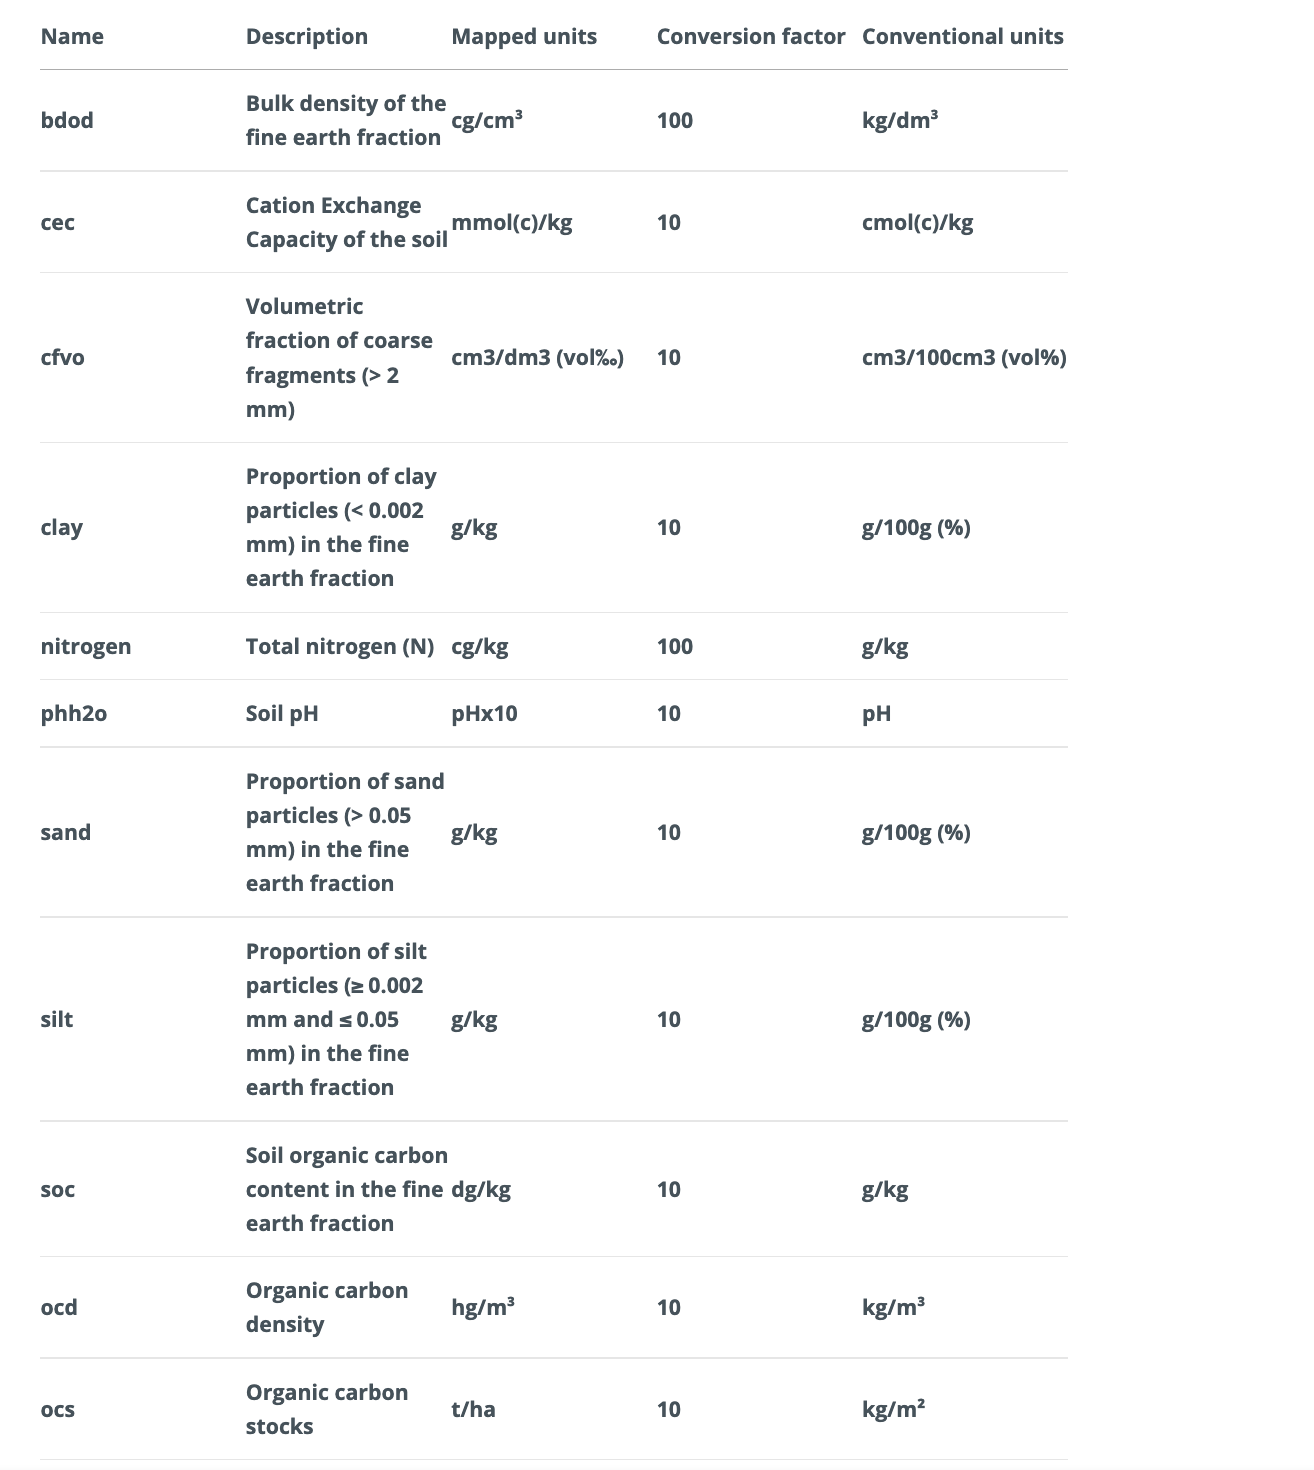
    
3. Missing data (amount and years/locations missing)
    - Time aspect is missing
    
4. Nulls or Nans
    - N/A
    
5. Primary key
    - Lat/Long
    
6. Columns to join on
    - Lat/Long
    
7. Any additional fields
    - Additional depth information for each soil type
    
# Ease of access

1. Is there a free to use license?
    - Yes
    
2. How is data accessed? (API, download)
    - Through WCS service (there is a python library for this)
    
3. Is the documentation straightforward?
    - Limited documentation
    
4. Any limits on how much data we can download?
    - No


In [2]:
from owslib.wcs import WebCoverageService

In [3]:
wcs = WebCoverageService('http://maps.isric.org/mapserv?map=/map/phh2o.map',
                         version='2.0.1')

In [4]:
cov_id = 'phh2o_0-5cm_mean'
ph_0_5 = wcs.contents[cov_id]
ph_0_5.supportedFormats

['image/tiff',
 'image/png',
 'image/jpeg',
 'image/png; mode=8bit',
 'image/vnd.jpeg-png',
 'image/vnd.jpeg-png8']

In [5]:
ph_0_5.supportedFormats

['image/tiff',
 'image/png',
 'image/jpeg',
 'image/png; mode=8bit',
 'image/vnd.jpeg-png',
 'image/vnd.jpeg-png8']

In [111]:
import pycrs
for match in pycrs.utils.search_area('brazil'): 
    print(match)

{'code': '4618', 'kind': 'CRS-GEOGCRS', 'bbox': [12.52, -91.72, -55.96, -25.28], 'wkt': 'GEOGCS["SAD69",DATUM["South_American_Datum_1969",SPHEROID["GRS 1967 Modified",6378160,298.25,AUTHORITY["EPSG","7050"]],TOWGS84[-57,1,-41,0,0,0,0],AUTHORITY["EPSG","6618"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4618"]]', 'unit': 'degree (supplier to define representation)', 'proj4': '+proj=longlat +ellps=aust_SA +towgs84=-57,1,-41,0,0,0,0 +no_defs', 'name': 'SAD69', 'area': 'Brazil - onshore and offshore. In rest of South America - onshore north of approximately 45°S and Tierra del Fuego.', 'default_trans': 1877, 'trans': [1864, 1865, 1866, 1867, 1868, 1869, 1870, 1871, 1872, 1873, 1874, 1875, 1876, 1877, 5542, 5882, 6967, 6969, 6974, 6975, 6976, 6977], 'accuracy': 5.0}
{'code': '5875', 'kind': 'CRS-PROJCRS', 'bbox': [-4.59, -74.01, -10.01, -71.99], 'wkt': 'PROJCS["SAD69(96) / UTM zone 18S",GEOGCS["SAD69(96)",DATUM

{'code': '6210', 'kind': 'CRS-PROJCRS', 'bbox': [5.13, -48.0, 0.0, -41.99], 'wkt': 'PROJCS["UTM Zone 23, Northern Hemisphere",GEOGCS["GRS 1980(IUGG, 1980)",DATUM["unknown",SPHEROID["GRS80",6378137,298.257222101],TOWGS84[0,0,0,0,0,0,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-45],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["Meter",1],AUTHORITY["epsg","6210"]]', 'unit': 'metre', 'proj4': '+proj=utm +zone=23 +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs', 'name': 'SIRGAS 2000 / UTM zone 23N', 'area': 'Brazil - offshore between 48°W and 42°W, northern hemisphere.', 'default_trans': 15894, 'trans': [15894], 'accuracy': 1.0}
{'code': '5877', 'kind': 'CRS-PROJCRS', 'bbox': [5.28, -66.0, -16.28, -59.99], 'wkt': 'PROJCS["SAD69(96) / UTM zone 20S",GEOGCS["SAD69(96)",DATUM["South_American_Datum_1969_96",SPHEROID["GRS 1

{'code': '5396', 'kind': 'CRS-PROJCRS', 'bbox': [4.26, -30.0, -23.86, -25.28], 'wkt': 'PROJCS["SIRGAS 2000 / UTM zone 26S",GEOGCS["SIRGAS 2000",DATUM["Sistema_de_Referencia_Geocentrico_para_las_AmericaS_2000",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],TOWGS84[0,0,0,0,0,0,0],AUTHORITY["EPSG","6674"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4674"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-27],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",10000000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","5396"]]', 'unit': 'metre', 'proj4': '+proj=utm +zone=26 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs', 'name': 'SIRGAS 2000 / UTM zone 26S', 'area': 'Brazil - east of 30°W, northern and southern hemispheres, onshore a

{'code': '29194', 'kind': 'CRS-PROJCRS', 'bbox': [0.74, -42.0, -26.35, -36.0], 'wkt': 'PROJCS["SAD69 / UTM zone 24S",GEOGCS["SAD69",DATUM["South_American_Datum_1969",SPHEROID["GRS 1967 Modified",6378160,298.25,AUTHORITY["EPSG","7050"]],TOWGS84[-57,1,-41,0,0,0,0],AUTHORITY["EPSG","6618"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4618"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-39],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",10000000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","29194"]]', 'unit': 'metre', 'proj4': '+proj=utm +zone=24 +south +ellps=aust_SA +towgs84=-57,1,-41,0,0,0,0 +units=m +no_defs', 'name': 'SAD69 / UTM zone 24S', 'area': 'Brazil - between 42°W and 36°W, northern and southern hemispheres, onshore and offshore.', 'default_tra

{'code': '32724', 'kind': 'CRS-PROJCRS', 'bbox': [0.0, -42.0, -80.0, -36.0], 'wkt': 'PROJCS["WGS 84 / UTM zone 24S",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-39],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",10000000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32724"]]', 'unit': 'metre', 'proj4': '+proj=utm +zone=24 +south +datum=WGS84 +units=m +no_defs', 'name': 'WGS 84 / UTM zone 24S', 'area': 'Between 42°W and 36°W, southern hemisphere between 80°S and equator, onshore and offshore. Brazil. South Georgia and the South Sandwich Islands.', 'default_trans': 0, 'trans': [],

{'code': '4208', 'kind': 'CRS-GEOGCRS', 'bbox': [4.26, -53.38, -35.71, -26.0], 'wkt': 'GEOGCS["Aratu",DATUM["Aratu",SPHEROID["International 1924",6378388,297,AUTHORITY["EPSG","7022"]],TOWGS84[-151.99,287.04,-147.45,0,0,0,0],AUTHORITY["EPSG","6208"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4208"]]', 'unit': 'degree (supplier to define representation)', 'proj4': '+proj=longlat +ellps=intl +towgs84=-151.99,287.04,-147.45,0,0,0,0 +no_defs', 'name': 'Aratu', 'area': "Brazil - offshore south and east of a line intersecting the coast at 2°55'S; onshore Tucano basin.", 'default_trans': 5067, 'trans': [10089, 10090, 10091, 10092, 10093, 10094, 1549, 1550, 1551, 1552, 15710, 15711, 15712, 15754, 5051, 5053, 5055, 5057, 5059, 5061, 5063, 5065, 5067], 'accuracy': 1.0}
{'code': '5880', 'kind': 'CRS-PROJCRS', 'bbox': [7.04, -74.01, -35.71, -25.28], 'wkt': 'PROJCS["SIRGAS 2000 / Brazil Polyconic",GEOGCS["SIRGAS 2000",

{'code': '29192', 'kind': 'CRS-PROJCRS', 'bbox': [7.04, -54.0, -35.71, -47.99], 'wkt': 'PROJCS["SAD69 / UTM zone 22S",GEOGCS["SAD69",DATUM["South_American_Datum_1969",SPHEROID["GRS 1967 Modified",6378160,298.25,AUTHORITY["EPSG","7050"]],TOWGS84[-57,1,-41,0,0,0,0],AUTHORITY["EPSG","6618"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4618"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-51],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",10000000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","29192"]]', 'unit': 'metre', 'proj4': '+proj=utm +zone=22 +south +ellps=aust_SA +towgs84=-57,1,-41,0,0,0,0 +units=m +no_defs', 'name': 'SAD69 / UTM zone 22S', 'area': 'Brazil - onshore and offshore northern and southern hemispheres between 54°W and 48°W. In remainder of

{'code': '4979', 'kind': 'CRS-GEOG3DCRS', 'bbox': [90.0, -180.0, -90.0, 180.0], 'wkt': '', 'unit': 'metre', 'proj4': '', 'name': 'WGS 84', 'area': "World: Afghanistan, Albania, Algeria, American Samoa, Andorra, Angola, Anguilla, Antarctica, Antigua and Barbuda, Argentina, Armenia, Aruba, Australia, Austria, Azerbaijan, Bahamas, Bahrain, Bangladesh, Barbados, Belgium, Belgium, Belize, Benin, Bermuda, Bhutan, Bolivia, Bonaire, Saint Eustasius and Saba, Bosnia and Herzegovina, Botswana, Bouvet Island, Brazil, British Indian Ocean Territory, British Virgin Islands, Brunei Darussalam, Bulgaria, Burkina Faso, Burundi, Cambodia, Cameroon, Canada, Cape Verde, Cayman Islands, Central African Republic, Chad, Chile, China, Christmas Island, Cocos (Keeling) Islands, Comoros, Congo, Cook Islands, Costa Rica, Côte d'Ivoire (Ivory Coast), Croatia, Cuba, Curacao, Cyprus, Czechia, Denmark, Djibouti, Dominica, Dominican Republic, East Timor, Ecuador, Egypt, El Salvador, Equatorial Guinea, Eritrea, Eston

In [87]:
import utm
from pyproj import CRS
lat1 = -22.93878669269356
lon1 = -43.244191436383794

x = utm.from_latlon(lat1, lon1)

In [88]:
x

(680038.7322108165, 7462181.114256203, 23, 'K')

In [109]:
crs = CRS.from_dict({'proj': 'utm', 'zone': 23})

In [110]:
crs

<Projected CRS: +proj=utm +zone=23 +type=crs>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: UTM zone 23N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [91]:
from pyproj import CRS
from pyproj.aoi import AreaOfInterest
from pyproj.database import query_utm_crs_info

utm_crs_list = query_utm_crs_info(
    datum_name="WGS 84",
    area_of_interest=AreaOfInterest(
        west_lon_degree=-43.244191436383794,
        south_lat_degree=-22.956901676381065 ,
        east_lon_degree=-43.21169979805631,
        north_lat_degree=-22.93878669269356,
    ),
)
utm_crs = CRS.from_epsg(utm_crs_list[0].code)

In [94]:
utm_crs

<Projected CRS: EPSG:32723>
Name: WGS 84 / UTM zone 23S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 48°W and 42°W, southern hemisphere between 80°S and equator, onshore and offshore. Brazil.
- bounds: (-48.0, -80.0, -42.0, 0.0)
Coordinate Operation:
- name: UTM zone 23S
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [95]:
utm_crs.to_epsg()

32723

In [113]:
from pyproj import Proj, transform

lat1 = -22.93878669269356
lon1 = -43.244191436383794

P3857 = Proj(init='epsg:5875')
P4326 = Proj(init='epsg:4326')

x1,y1 = transform(P4326, P3857, lon1, lat1)
print(x1)
print(y1)

3875845.260923708
7070716.675657205


/Users/vivekmishra/anaconda3/envs/gbif/lib/python3.8/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/vivekmishra/anaconda3/envs/gbif/lib/python3.8/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/var/folders/zb/c01q1bms037cq1b2vq_c7mfh0000gn/T/ipykernel_45504/3814351195.py:9: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/sta

In [114]:
from pyproj import Proj, transform

lat2 = -22.956901676381065 
lon2 = -43.21169979805631

P3857 = Proj(init='epsg:5875')
P4326 = Proj(init='epsg:4326')

x2,y2 = transform(P4326, P3857, lon2, lat2)
print(x2)
print(y2)

3879010.606000266
7067590.115600581


/Users/vivekmishra/anaconda3/envs/gbif/lib/python3.8/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/vivekmishra/anaconda3/envs/gbif/lib/python3.8/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/var/folders/zb/c01q1bms037cq1b2vq_c7mfh0000gn/T/ipykernel_45504/2244122951.py:9: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/sta

In [115]:
subsets = [('X', 3875845, 3879010), ('Y', 7067590, 7070716)]

In [118]:
crs = "http://www.opengis.net/def/crs/EPSG/0/5875"

In [119]:
response = wcs.getCoverage(
    identifier=[cov_id], 
    crs=crs,
    subsets=subsets,  
    format='GEOTIFF_INT16')

In [120]:
response.read()

b'II*\x00\x08\x00\x00\x00\x15\x00\x00\x01\x03\x00\x01\x00\x00\x00\r\x00\x00\x00\x01\x01\x03\x00\x01\x00\x00\x00\r\x00\x00\x00\x02\x01\x03\x00\x01\x00\x00\x00\x10\x00\x00\x00\x03\x01\x03\x00\x01\x00\x00\x00\x08\x00\x00\x00\x06\x01\x03\x00\x01\x00\x00\x00\x01\x00\x00\x00\x15\x01\x03\x00\x01\x00\x00\x00\x01\x00\x00\x00\x1a\x01\x05\x00\x01\x00\x00\x00\n\x01\x00\x00\x1b\x01\x05\x00\x01\x00\x00\x00\x12\x01\x00\x00\x1c\x01\x03\x00\x01\x00\x00\x00\x01\x00\x00\x00(\x01\x03\x00\x01\x00\x00\x00\x02\x00\x00\x00=\x01\x03\x00\x01\x00\x00\x00\x02\x00\x00\x00B\x01\x03\x00\x01\x00\x00\x00\x00\x01\x00\x00C\x01\x03\x00\x01\x00\x00\x00\x00\x01\x00\x00D\x01\x04\x00\x01\x00\x00\x00\xf8\x02\x00\x00E\x01\x04\x00\x01\x00\x00\x00S\x02\x00\x00S\x01\x03\x00\x01\x00\x00\x00\x02\x00\x00\x00\x0e\x83\x0c\x00\x03\x00\x00\x00\x1a\x01\x00\x00\x82\x84\x0c\x00\x06\x00\x00\x002\x01\x00\x00\xaf\x87\x03\x00,\x00\x00\x00b\x01\x00\x00\xb0\x87\x0c\x00\x02\x00\x00\x00\xba\x01\x00\x00\xb1\x87\x02\x00.\x01\x00\x00\xca\x01\x00\x00\

In [121]:
with open('test.tif', 'wb') as file:
    file.write(response.read())

In [122]:
from PIL import Image
import numpy as np
im = Image.open('test.tif')
im.show()

In [123]:
imarray = np.array(im)

In [124]:
imarray.shape

(13, 13)

In [125]:
imarray[:,:]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int32)

In [126]:
np.median(imarray)/10

0.0

In [127]:
from scipy import stats
stats.mode(imarray)

ModeResult(mode=array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int32), count=array([[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]]))

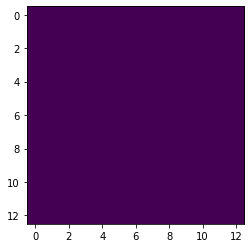

In [128]:
from osgeo import gdal
import matplotlib.pyplot as plt
dataset = gdal.Open('test.tif', gdal.GA_ReadOnly) 
band = dataset.GetRasterBand(1)
arr = band.ReadAsArray()
plt.imshow(arr)

In [68]:
band.GetStatistics( True, True )

[0.0, 76.0, 67.30275790374861, 16.16663223734441]

In [69]:
dataset.GetProjection()

'PROJCS["Interrupted_Goode_Homolosine",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Interrupted_Goode_Homolosine"],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'

In [70]:
geotransform = dataset.GetGeoTransform()

In [71]:
print("Origin = ({}, {})".format(geotransform[0], geotransform[3]))
print("Pixel Size = ({}, {})".format(geotransform[1], geotransform[5]))

Origin = (7444913.55, 4740920.919999999)
Pixel Size = (249.95151898732934, -249.88154589371683)


In [72]:
band = dataset.GetRasterBand(1)
print("Band Type={}".format(gdal.GetDataTypeName(band.DataType)))

min = band.GetMinimum()
max = band.GetMaximum()
if not min or not max:
    (min,max) = band.ComputeRasterMinMax(True)
print("Min={:.3f}, Max={:.3f}".format(min,max))

if band.GetOverviewCount() > 0:
    print("Band has {} overviews".format(band.GetOverviewCount()))

if band.GetRasterColorTable():
    print("Band has a color table with {} entries".format(band.GetRasterColorTable().GetCount()))


Band Type=Int16
Min=0.000, Max=76.000


In [73]:
scanline = band.ReadRaster(xoff=0, yoff=0,
                        xsize=band.XSize, ysize=1,
                        buf_xsize=band.XSize, buf_ysize=1,
                        buf_type=gdal.GDT_Float32)

In [74]:
import struct
tuple_of_floats = struct.unpack('f' * band.XSize, scanline)

In [75]:
tuple_of_floats

(69.0,
 69.0,
 70.0,
 69.0,
 69.0,
 69.0,
 69.0,
 68.0,
 68.0,
 68.0,
 69.0,
 68.0,
 69.0,
 70.0,
 69.0,
 69.0,
 70.0,
 70.0,
 70.0,
 71.0,
 71.0,
 73.0,
 72.0,
 73.0,
 70.0,
 72.0,
 72.0,
 71.0,
 70.0,
 69.0,
 69.0,
 70.0,
 70.0,
 69.0,
 69.0,
 69.0,
 69.0,
 69.0,
 69.0,
 68.0,
 68.0,
 68.0,
 69.0,
 69.0,
 69.0,
 69.0,
 69.0,
 70.0,
 71.0,
 71.0,
 71.0,
 71.0,
 71.0,
 72.0,
 71.0,
 71.0,
 71.0,
 72.0,
 72.0,
 72.0,
 72.0,
 72.0,
 72.0,
 72.0,
 72.0,
 72.0,
 72.0,
 72.0,
 72.0,
 72.0,
 72.0,
 72.0,
 72.0,
 72.0,
 73.0,
 68.0,
 66.0,
 66.0,
 66.0)

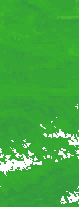

In [94]:
from IPython.display import Image
Image(filename='test.png')

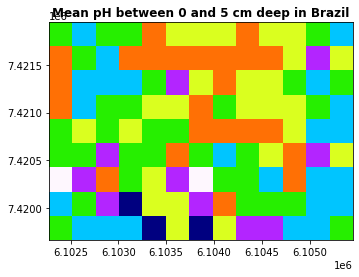

<AxesSubplot:title={'center':'Mean pH between 0 and 5 cm deep in Brazil'}>

In [83]:
import rasterio
from rasterio import plot

ph = rasterio.open("test.tif", driver="GTiff")
%matplotlib inline
plot.show(ph, title='Mean pH between 0 and 5 cm deep in Brazil', cmap='gist_ncar')

<open DatasetReader name='test.tif' mode='r'>